# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.844  1  1.689 0.195 0.009   
                             age        0.075  1  0.150 0.699 0.001   
                             Kiel       1.881  1  3.764 0.054 0.019   
                             Magdeburg  3.991  1  7.985 0.005 0.040   
                             Sweden     7.220  1 14.446 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.248  1  0.285 0.594 0.001   
                             age        0.611  1  0.704 0.403 0.004   
                             Kiel       0.175  1  0.201 0.654 0.001   
                             Magdeburg  1.671  1  1.924 0.167 0.010   
                             Sweden    12.710  1 14.639 0.000 0.071   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.709  0.341    False  
                             age               0.155  0.803    False  
                             Kiel              1.269  0.129    False  
                             Magdeburg         2.283  0.020     True  
                             Sweden            3.712  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.226  0.727    False  
                             age               0.395  0.564    False  
                             Kiel              0.184  0.772    False  
                             Magdeburg         0.777  0.306    False  
                             Sweden            3.754  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.906  1  6.799 0.010 0.034   
                             age        0.001  1  0.007 0.932 0.000   
                             Kiel       0.200  1  1.500 0.222 0.008   
                             Magdeburg  0.437  1  3.281 0.072 0.017   
                             Sweden     1.601  1 12.013 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.081  1  2.331 0.128 0.012   
                             age        1.206  1  2.601 0.108 0.013   
                             Kiel       1.644  1  3.547 0.061 0.018   
                             Magdeburg  1.109  1  2.393 0.124 0.012   
                             Sweden    10.494  1 22.640 0.000 0.106   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.007  0.028     True  
                             age               0.031  0.958    False  
                             Kiel              0.653  0.348    False  
                             Magdeburg         1.145  0.143    False  
                             Sweden            3.186  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.891  0.228    False  
                             age               0.965  0.200    False  
                             Kiel              1.213  0.126    False  
                             Magdeburg         0.908  0.221    False  
                             Sweden            5.415  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.195         0.709  0.341    False   
                             Kiel      0.054         1.269  0.129    False   
                             Magdeburg 0.005         2.283  0.020     True   
                             Sweden    0.000         3.712  0.001     True   
                             age       0.699         0.155  0.803    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.594         0.226  0.727    False   
                             Kiel      0.654         0.184  0.772    False   
                             Magdeburg 0.167         0.777  0.306    False   
                             Sweden    0.000         3.754  0.001     True   
                             age       0.403         0.395  0.564    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.010         2.007  0.028     True  
                             Kiel      0.222         0.653  0.348    False  
                             Magdeburg 0.072         1.145  0.143    False  
                             Sweden    0.001         3.186  0.003     True  
                             age       0.932         0.031  0.958    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.128         0.891  0.228    False  
                             Kiel      0.061         1.213  0.126    False  
                             Magdeburg 0.124         0.908  0.221    False  
                             Sweden    0.000         5.415  0.000     True  
                             age       0.108         0.965  0.200    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.483     0.336     0.233         3.098     0.291
std       0.301         5.309     0.328     0.296         5.834     0.323
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.338     0.015     0.001         0.390     0.003
50%       0.122         0.912     0.245     0.071         1.147     0.142
75%       0.460         2.413     0.613     0.408         3.115     0.544
max       1.000       142.964     1.000     1.000        86.033     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_47941/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.195         0.709   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.327   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.081         1.090   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.524         0.280   
A0A075B6H7                                         AD     0.233         0.632   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.042         1.377   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.535         0.272   
S4R3U6                                             AD     0.594         0.226   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.341    False   
A0A024R0T9;K7ER74;P02655                           AD      0.116    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.179    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.668    False   
A0A075B6H7                                         AD      0.387    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.106    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.677    False   
S4R3U6                                             AD      0.727    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.010         2.007   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.465   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.469         0.329   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.260         0.585   
A0A075B6H7                                         AD     0.002         2.748   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.222         0.653   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.601         0.221   
S4R3U6                                             AD     0.128         0.891   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.028     True  
A0A024R0T9;K7ER74;P02655                           AD      0.079    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.601    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.393    False  
A0A075B6H7                                         AD      0.006     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.405     0.333     0.247         1.521     0.312
std       0.288         1.654     0.313     0.293         1.756     0.317
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.011         0.364     0.038     0.009         0.372     0.025
50%       0.124         0.905     0.248     0.101         0.997     0.188
75%       0.432         1.942     0.591     0.425         2.057     0.560
max       0.998        24.584     0.998     0.998        18.115     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1038,970


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.195         0.709  0.341   
A0A024R0T9;K7ER74;P02655                           0.047         1.327  0.116   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.081         1.090  0.179   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.524         0.280  0.668   
A0A075B6H7                                         0.233         0.632  0.387   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.042         1.377  0.106   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.535         0.272  0.677   
S4R3U6                                             0.594         0.226  0.727   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.010   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.469   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.260   
A0A075B6H7                                            False 0.002   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.222   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.601   
S4R3U6                                                False 0.128   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.007  0.028   
A0A024R0T9;K7ER74;P02655                                   1.465  0.079   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.329  0.601   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.585  0.393   
A0A075B6H7                                                 2.748  0.006   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.290   
Q9Y6X5                                                     0.653  0.348   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.221  0.715   
S4R3U6                                                     0.891  0.228   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    902
PI (yes) - RF (yes)   315
PI (no)  - RF (yes)   136
PI (yes) - RF (no)     68
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_47941/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.195         0.709  0.341    False 0.010   
A0A075B6H7                   0.233         0.632  0.387    False 0.002   
A0A075B6I0                   0.021         1.679  0.061    False 0.001   
A0A075B6J9                   0.078         1.110  0.173    False 0.012   
A0A075B6R2                   0.485         0.315  0.636    False 0.002   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.009         2.033  0.032     True 0.273   
Q9ULZ9                       0.001         3.094  0.004     True 0.025   
Q9UP79                       0.164         0.784  0.303    False 0.000   
Q9UQ52                       0.078         1.108  0.173    False 0.001   
Q9Y281;Q9Y281-3              0.322         0.492  0.485    False 0.014   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.007  0.028     True       186  
A0A075B6H7                           2.748  0.006     True        91  
A0A075B6I0                           3.103  0.003     True       194  
A0A075B6J9                           1.917  0.033     True       156  
A0A075B6R2                           2.644  0.008     True       164  
...                                    ...    ...      ...       ...  
Q9UKB5                               0.564  0.407    False       148  
Q9ULZ9                               1.595  0.061    False       171  
Q9UP79                               3.686  0.001     True       135  
Q9UQ52                               3.143  0.003     True       188  
Q9Y281;Q9Y281-3                      1.845  0.038     True        51  

[204 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.341,0.028,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.116,0.079,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.179,0.601,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.668,0.393,196,PI (no) - RF (no)
A0A075B6H7,0.387,0.006,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.317,0.290,197,PI (no) - RF (no)
Q9Y6X5,0.106,0.348,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O60565,0.998,0.014,81,PI (no) - RF (yes),0.984
Q96PQ0,0.011,0.987,177,PI (yes) - RF (no),0.976
P48745,0.976,0.009,180,PI (no) - RF (yes),0.968
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.961,0.001,134,PI (no) - RF (yes),0.960
F6VDH7;P50502;Q3KNR6,0.008,0.958,175,PI (yes) - RF (no),0.950
...,...,...,...,...,...
Q9P2E7;Q9P2E7-2,0.042,0.051,196,PI (yes) - RF (no),0.009
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
Q16706,0.044,0.053,195,PI (yes) - RF (no),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


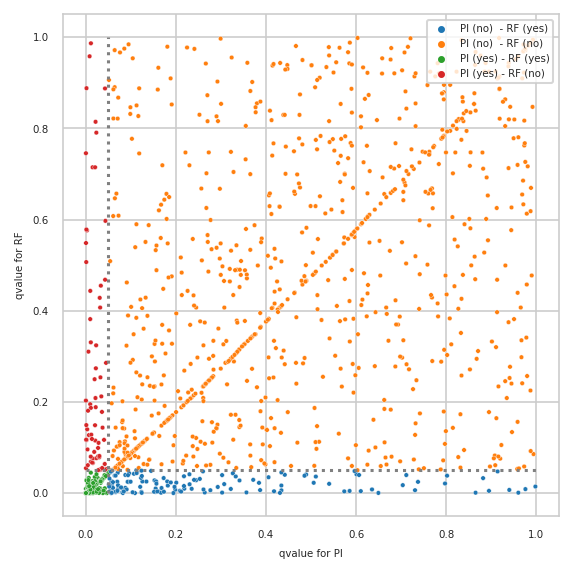

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


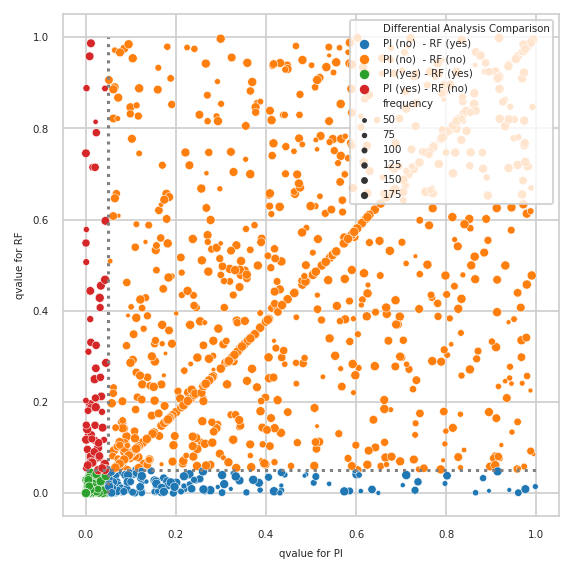

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AP1M2,ENSP00000465685,0.682
CRISPLD2,ENSP00000262424,0.681
PRSS23,ENSP00000280258,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/c643ee7f4c0bb0357e98a520d824c308_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out